# Clustering

### 1)Loading Data
### 2)KMeans
<li>Kmean</li>
<li>Scaling</li>
<li>Choosing K</li>
<li>Profiling</li>

### 3)DBSCAN

## Loading Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans #imports Kmean algorithm from the sklearn's cluster library
from sklearn import metrics #imports metrics from sklearn library
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv('New_York_City_Leading_Causes_of_Death.csv')
df = data.copy()
df.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2010,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,299,35.1,35.5
1,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1840,215.7,268.3
2,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,64,5.1,5.4
3,2012,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,152,17.8,18.6
4,2009,All Other Causes,M,Asian and Pacific Islander,220,43.1,56.1


In [3]:
df.dtypes

Year                         int64
Leading Cause               object
Sex                         object
Race Ethnicity              object
Deaths                       int64
Death Rate                 float64
Age Adjusted Death Rate    float64
dtype: object

We have divided the dataframe into two groups. We will only consider numerical values in our KMean algorithm because KMean only supports numerical input.

In [4]:
numerical = df[['Year', 'Deaths', 'Death Rate', 'Age Adjusted Death Rate']]
categorical = df[['Leading Cause', 'Sex', 'Race Ethnicity']]

# KMeans

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:
<br><br>
<li>The centroids of the K clusters, which can be used to label new data</li>
<li>Labels for the training data (each data point is assigned to a single cluster)</li><br>
Rather than defining groups before looking at the data, clustering allows you to find and analyze the groups that have formed organically. The "Choosing K" section below describes how the number of groups can be determined.  

Each centroid of a cluster is a collection of feature values which define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret what kind of group each cluster represents.  

In [5]:
kmeans = KMeans(n_clusters=5, random_state=0) # this will initialize the Kmean object
kmeans.fit(numerical) # this will fit the algorithm on our given dataset.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

Kmean.fit command runs the Kmean algorithm on the provided dataset.

Now lets make a copy of df in a new variable ***pred***.
To get to know that which observation belongs to which cluster, there is an attribute ***labels_***. This will return the list of labels and assign it to the new column ***kmean1***

In [6]:
pred = df.copy()
pred['kmean1'] = kmeans.labels_ # this will assign the labels to the new kmean1 column
pred.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate,kmean1
0,2010,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,299,35.1,35.5,1
1,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1840,215.7,268.3,0
2,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,64,5.1,5.4,1
3,2012,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,152,17.8,18.6,1
4,2009,All Other Causes,M,Asian and Pacific Islander,220,43.1,56.1,1


The **kmean1** column shows the lables of the Kmean algorithm. For example row index 0 belongs to cluster 1 and row 1 belongs to cluster 0 and row 2 belongs 2 cluster 1 and so on

In [7]:
pred['kmean1'].value_counts()

1    564
4     72
0     40
3     23
2      9
Name: kmean1, dtype: int64

The above output shows the number of obervations in each cluster

# Scaling

#### Why need scaling?
<br>Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization.

### Scaling using min max

Also known as min-max scaling or min-max normalization, is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data. The general formula is given as:
<br>

*Formula*
<br>zi=(xi−min(x))/(max(x)−min(x))

In [8]:
scaled = numerical.copy()
scaled['Year'] = (scaled['Year'] - scaled['Year'].min()) / (scaled['Year'].max()-scaled['Year'].min())
scaled['Deaths'] = (scaled['Deaths'] - scaled['Deaths'].min()) / (scaled['Deaths'].max()-scaled['Deaths'].min())
scaled['Death Rate'] = (scaled['Death Rate'] - scaled['Death Rate'].min()) / (scaled['Death Rate'].max()-scaled['Death Rate'].min())
scaled['Age Adjusted Death Rate'] = (scaled['Age Adjusted Death Rate'] - scaled['Age Adjusted Death Rate'].min()) /( scaled['Age Adjusted Death Rate'].max()-scaled['Age Adjusted Death Rate'].min())
scaled.head()

,Year,Deaths,Death Rate,Age Adjusted Death Rate
0,0.428571,0.040642,0.066871,0.094773
1,0.571429,0.259628,0.436196,0.763354
2,1.000000,0.007247,0.005521,0.008329
3,0.714286,0.019753,0.031493,0.046238
4,0.285714,0.029416,0.083231,0.153935


### Scaling using MinMaxScaler function

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler() #initialize MinMaxScaler object

In [11]:
new=scaler.fit_transform(numerical) #fit and transform the values

In the above step the scaling is done by the built in min max scaler function

In [12]:
cols=['Year', 'Deaths', 'Death Rate', 'Age Adjusted Death Rate']

In [13]:
scaled=pd.DataFrame(columns=cols,data=new) #convert the scaled values into the dataframe

In [14]:
scaled.head()

,Year,Deaths,Death Rate,Age Adjusted Death Rate
0,0.428571,0.040642,0.066871,0.094773
1,0.571429,0.259628,0.436196,0.763354
2,1.000000,0.007247,0.005521,0.008329
3,0.714286,0.019753,0.031493,0.046238
4,0.285714,0.029416,0.083231,0.153935


Now we will use the scaled variables and see how our clusters differ

In [15]:
kmean2 = KMeans(n_clusters=5, random_state=0)
kmean2.fit(scaled)
pred['kmean2'] = kmean2.labels_
pred.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate,kmean1,kmean2
0,2010,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,299,35.1,35.5,1,2
1,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1840,215.7,268.3,0,3
2,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,64,5.1,5.4,1,0
3,2012,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,152,17.8,18.6,1,0
4,2009,All Other Causes,M,Asian and Pacific Islander,220,43.1,56.1,1,2


In [16]:
pred['kmean2'].value_counts()

2    216
0    208
1    147
3     73
4     64
Name: kmean2, dtype: int64

From the above output you can see that now the distribution of the clusters has changed

## Choosing K

### Elbow Analysis

The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.

### Working

One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE).Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k

In [17]:
def sse(x, means):
    return np.sum((x[['Year', 'Deaths', 'Death Rate', 'Age Adjusted Death Rate']].values - means[x['pred']])**2)

In [18]:
n = []
ss = []
for i in range(30):
    d = scaled.copy()
    k = KMeans(n_clusters=i+1, random_state=0).fit(d)
    d['pred'] = k.labels_
    means = dict()
    for c in d['pred'].unique():
        m = d[d['pred'] == c][['Year', 'Deaths', 'Death Rate', 'Age Adjusted Death Rate']].mean().values
        means[c] = m
    d['sse'] = d.apply(lambda x: sse(x, means), axis=1)
    n.append(i+1)
    ss.append(d['sse'].sum())

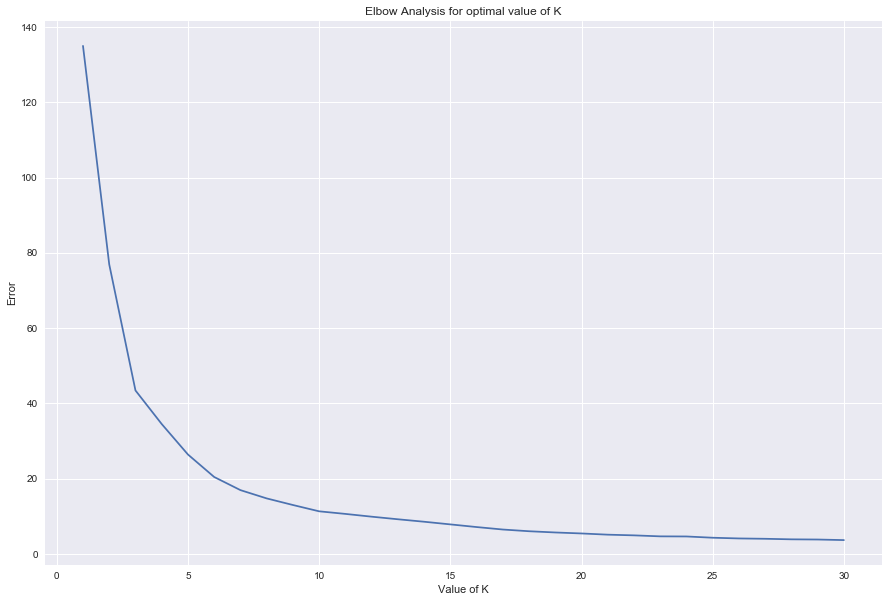

In [19]:
plt.figure(figsize=(15,10));
plt.plot(n, ss);
plt.xlabel('Value of K');
plt.ylabel('Error');
plt.title('Elbow Analysis for optimal value of K');

From the above graph we can see that the elbow is formed when the input was 3 clusters.
<br>So now we will use 3 clusters

In [20]:
kmean3 = KMeans(n_clusters=3, random_state=0)
kmean3.fit(scaled)
pred['kmean3'] = kmean3.labels_
pred['kmean3'].value_counts()

2    307
1    296
0    105
Name: kmean3, dtype: int64

### Silhouette Score

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

In [21]:
from sklearn import metrics

In [22]:
metrics.silhouette_score(scaled, kmean3.labels_)

0.5101428811514871

## Profiling

**Profiling and its usage**<br>
Having decided (for now) how many clusters to use, we would like to get a better understanding of what values are in those clusters are and interpret them.

Data analytics is used to eventually make decisions, and that is feasible only when we are comfortable (enough) with our understanding of the analytics results, including our ability to clearly interpret them.

To this purpose, one needs to spend time visualizing and understanding the data within each of the selected clusters. For example, one can see how the summary statistics (e.g. averages, standard deviations, etc) of the profiling attributes differ across the segments.

In our case, assuming we decided we use the 3 clusters found using kmean algorithm as outlined above, we can see how the responses changes across clusters. The average values of our data within each cluster are:

In [23]:
p_ = pred[['Year', 'Deaths', 'Death Rate', 'Age Adjusted Death Rate', 'kmean3']]
pivoted = p_.groupby('kmean3')['Year', 'Deaths', 'Death Rate', 'Age Adjusted Death Rate'].mean().reset_index()

pivoted

,kmean3,Year,Deaths,Death Rate,Age Adjusted Death Rate
0,0,2010.647619,2472.295238,207.007619,191.173333
1,1,2012.533784,260.743243,26.239527,28.289865
2,2,2008.452769,267.065147,27.140065,30.632899


# Radar Plot

The radar chart is a chart and/or plot that consists of a sequence of equi-angular spokes, called radii, with each spoke representing one of the variables. The data length of a spoke is proportional to the magnitude of the variable for the data point relative to the maximum magnitude of the variable across all data points. A line is drawn connecting the data values for each spoke. This gives the plot a star-like appearance and the origin of one of the popular names for this plot.

**Usage** <br>
Which observations are most similar, i.e., are there clusters of observations? (Radar charts are used to examine the relative values for a single data point (e.g., point 3 is large for variables 2 and 4, small for variables 1, 3, 5, and 6) and to locate similar points or dissimilar points.)

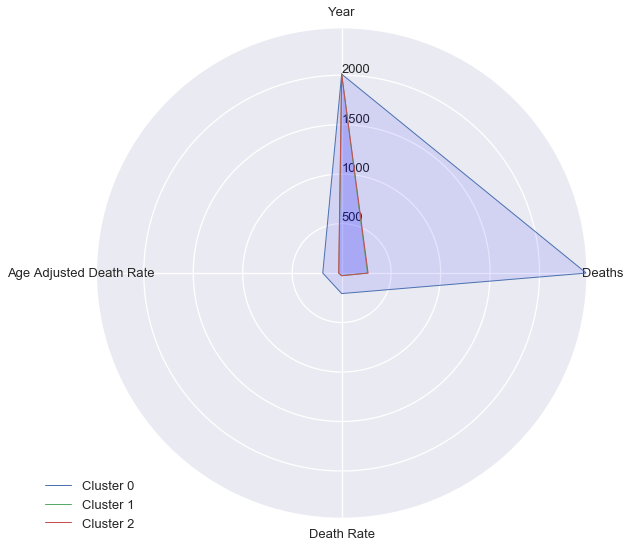

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
sns.set_context("talk")
# Set data
df=pivoted.copy()

# ------- PART 1: Create background

# number of variable
categories=list(df)[1:]
N = len(categories)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
#print(fig_size)


# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
#plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,pivoted.max().values.max())




# ------- PART 2: Add plots

# Plot each individual = each line of the data

# Ind1
values=df.loc[0].drop('kmean3').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 0")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=df.loc[1].drop('kmean3').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 1")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind3
values=df.loc[2].drop('kmean3').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 2")
ax.fill(angles, values, 'b', alpha=0.1)


# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Snake Plot

We can also “visualize” the cluster using snake plots for each cluster. For example, we can plot the means of the profiling variables for each of our clusters to better visualize differences between them. 

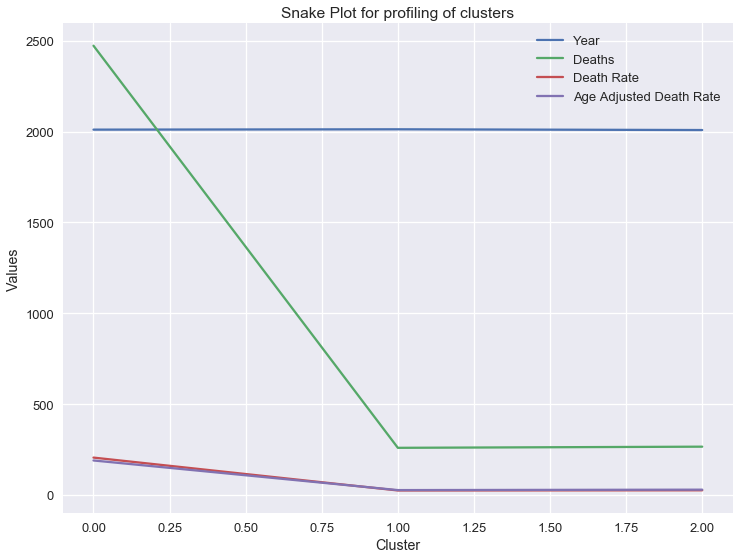

In [25]:
plt.plot(pivoted['kmean3'], pivoted['Year']);
plt.plot(pivoted['kmean3'], pivoted['Deaths']);
plt.plot(pivoted['kmean3'], pivoted['Death Rate']);
plt.plot(pivoted['kmean3'], pivoted['Age Adjusted Death Rate']);
plt.xlabel('Cluster');
plt.ylabel('Values');
plt.title('Snake Plot for profiling of clusters');
plt.legend();

From the above graph you can see that the visualization is haphazard. That is is because we did not standardize the means.




Now we will do it with standardization.<br>
For better visualization we plot the standardized profiling variables.

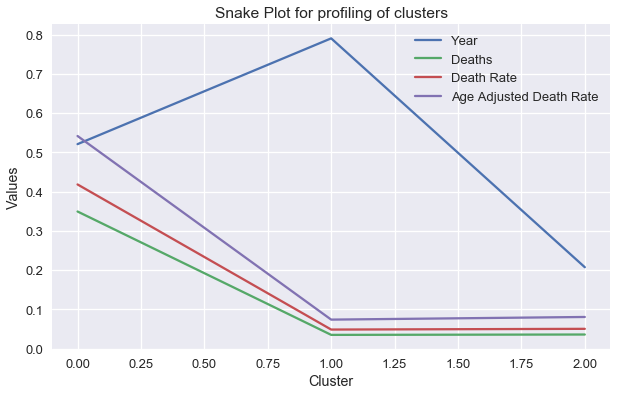

In [26]:
s_ = scaled.join(p_[['kmean3']]) #join the cluster labels with the standardized dataframe
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)
pivoted2 = s_.groupby('kmean3')['Year', 'Deaths', 'Death Rate', 'Age Adjusted Death Rate'].mean().reset_index() #take mean of the standardized df
ax.plot(pivoted2['kmean3'], pivoted2['Year']);
ax.plot(pivoted2['kmean3'], pivoted2['Deaths']);
ax.plot(pivoted2['kmean3'], pivoted2['Death Rate']);
ax.plot(pivoted2['kmean3'], pivoted2['Age Adjusted Death Rate']);

plt.xlabel('Cluster');
plt.ylabel('Values');
plt.title('Snake Plot for profiling of clusters');
ax.legend();

plt.show()


Now we can easily interpret the results

# DBSCAN clustering algorithm

Density-based spatial clustering of applications with noise (DBSCAN) is a well-known data clustering algorithm that is commonly used in data mining and machine learning.

Based on a set of points , DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions.

The DBSCAN algorithm basically requires 2 parameters:
<br><br>

<li><b>eps:</b> the minimum distance between two points. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors.</li>
<li><b>min_samples:</b> the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region.</li>

In [27]:
from sklearn.cluster import DBSCAN #import DBSCAN algorithm from sklearn's cluster library

In [28]:
db = DBSCAN(eps=0.1, min_samples=10) #initialize the settings on the DBSCAN algorithm

In [29]:
scaled.head()

,Year,Deaths,Death Rate,Age Adjusted Death Rate
0,0.428571,0.040642,0.066871,0.094773
1,0.571429,0.259628,0.436196,0.763354
2,1.000000,0.007247,0.005521,0.008329
3,0.714286,0.019753,0.031493,0.046238
4,0.285714,0.029416,0.083231,0.153935


In [30]:
db.fit(scaled) #runs DBSCAN on the scaled dataset 

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=1, p=None)

In [31]:
pred['dbscan'] = db.labels_
pred['dbscan'].value_counts()

-1    177
 5     68
 4     68
 6     67
 3     67
 0     66
 7     65
 2     65
 1     65
Name: dbscan, dtype: int64

In the above labels do you see anything different? Yes you are right, the label with a negetive value. This means that those observations which do not belong to any cluster are kept in a negetive label

In [32]:
pred.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate,kmean1,kmean2,kmean3,dbscan
0,2010,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,299,35.1,35.5,1,2,2,0
1,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1840,215.7,268.3,0,3,0,-1
2,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,64,5.1,5.4,1,0,1,1
3,2012,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,152,17.8,18.6,1,0,1,2
4,2009,All Other Causes,M,Asian and Pacific Islander,220,43.1,56.1,1,2,2,3


The

In [33]:
metrics.silhouette_score(scaled, db.labels_)

0.49416557790458676

The silhouette score is greater than zero therefore the cluster overlap is less.